In [ ]:
# Show available files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Pandas

In [ ]:
import pandas as pd

### Load data
in pandas data is represented ad dataframe(df). Dataframe is like tables or sheets in exel.
Reading csv data from file.

In [15]:
house_df = pd.read_csv('/kaggle/input/housing-prices-kaggle-learn-dataset/train.csv')

Get number of rows and columns of a pandas dataframe or numpy array

In [16]:
house_df.shape # (rows, columns)

(1460, 81)

### Display data
**describe()** method displays impoortant statistics about all the columns in the dataframe.

**head()** method displays initial rows of the dataframe. Number of rows to be displayed can be specified as **head(number_of_rows)**

In [ ]:
house_df.describe()

In [ ]:
house_df.head()

### Operations

**Select columns**

In [ ]:
# single column
sale_price=house_df["SalePrice"]
sale_price.head(5)

In [ ]:
# multiple columns
feature_columns=["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
multiple_columns=housing_df[feature_columns]

## Prepare training and testing data

Data is mainly divided in to 2 category, features data and target data.

#### Features(**X**) and Target(**y**) columns
**Features** are the data(columns) which the model will take as input and give the prediction as output.

**Target** is the actual value that we want to predict. Target data is compared with the predictions made by the model and the model make adjustments to for better prediction.

#### Training and testing(validation) dataset
Training data is used to train the model and testing data is used to test the accuracy of the model. Each dataset contains features and target columns.
If only one dataset is given, then we should divide it into 2 catagories of data, one for **Training** and one for **Validating**.

Both training and testing dataset contains set of features and target columns, denoted as **"X_train, y_train, X_valid, y_valid"**

### Preparing features and targets from training and testing datasets

There are multiple ways to do this.

1. **define feature columns and target column individually**

we can define specific columns that we want to use as features

In [ ]:
feature_columns=["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
target_column='SalePrice'

X_train=house_df[feature_columns]
y_train=house_df[target_column]

print(f"features:\n {X_train.head(1)}")
print(f"target:\n {train_y.head(1)}")

2. **from the dataset, pop the target column and save to use as target column and the rest of the dataset will be used as features**

If all the columns of the dataset (except the target) will be used as features then this method is useful

**IMPORTANT!** remember to remove any column from features dataset that is not necessary

In [ ]:
y_train=house_df.pop('SalePrice')
X_train=house_df

print(f"features:\n {X_train.head(1)}")
print(f"target:\n {train_y.head(1)}")

#### 3. **IMPORTANT!** **use scikit learn to divide training and testing data**

In most cases we want to divide the dataset in to part for training and testing for model validation. This is a efficient to do that.



In [ ]:
from sklearn.model_selection import train_test_split

feature_columns=["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
target_column='SalePrice'

X = house_df[feature_columns]
y = house_df[target_column]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

# Scikit learn

### Defining Models

There are many predefined models in scikit learn. Some of them are Decision tree, random forest

For model reproducibility, set a numeric value for random_state when specifying the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
housing_model = DecisionTreeRegressor(random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
housing_model = RandomForestRegressor(random_state=1)

### Train models

In [13]:
housing_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

### Make prediction

In [ ]:
prediction = housing_model.predict(X_test)
print(prediction[:5]) # prints first 5 predictions

### Calculate error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, prediction)
print(f"mean absolute error on test data:{mae}")

# Nural network using Tensorflow and keras

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Tensor**: 

Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU) accelerators. TPUs, in fact, are designed specifically for tensor computations. Internally, Keras represents the weights of a neural network with tensors.

**Input shape**: 

Input shape is the number of feature columns. Keras represents weights as tensors, but also uses tensors to represent data. When you set the input_shape argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting input_shape=[3] would create a network accepting vectors of length 3, like [0.2, 0.4, 0.6]

A "layer" in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. Many layers, like the convolutional and recurrent layers, transform data through use of neurons and differ primarily in the pattern of connections they form. Others though are used for feature engineering or just simple arithmetic. There's a whole world of layers to discover [-- check them out!](https://www.tensorflow.org/api_docs/python/tf/keras/layers)



### Single nuron

In [19]:
input_shape = [10]
model = keras.Sequential([layers.Dense(units=1, input_shape=input_shape)])

### Deep neural network

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.

There is a whole family of variants of the 'relu' activation -- 'elu', 'selu', and 'swish', among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from 'relu' to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

In [ ]:
model = keras.Sequential([
    layers.Dense(units=512,activation='relu', input_shape=input_shape),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=1)
])

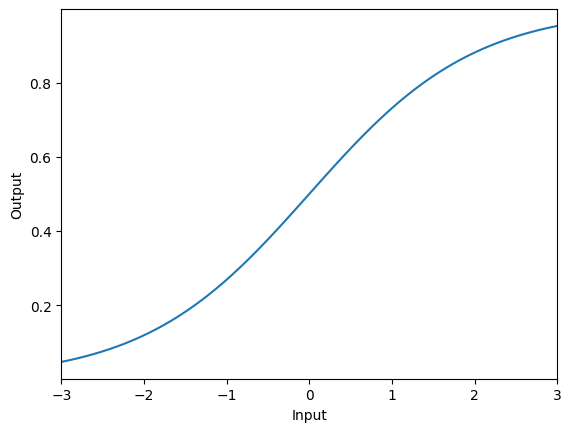

In [6]:
import matplotlib.pyplot as plt
activation_layer = layers.Activation('sigmoid') # sigmoid, relu, elu, selu

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

#### More layers
There's more to the world of deep learning than just dense layers. There are dozens of kinds of layers you might add to a model. ([Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/)) Some are like dense layers and define connections between neurons, and others can do preprocessing or transformations of other sorts.

**Dropout layer**

dropout layer, can help correct overfitting.
overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart. To break up these conspiracies, we randomly drop out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

In keras the dropout rate argument defines what percentage of the input units to shut off. Put the Dropout layer just before the layer you want the dropout applied to.

In [ ]:
keras.Sequential([
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
])

**Batch Normalization layer**

batch normalization (or "batchnorm"), can help correct training that is slow or unstable.

With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's StandardScaler or MinMaxScaler. The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.

t seems that batch normalization can be used at almost any point in a network. If you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's StandardScaler.

In [ ]:
# You can put it after a layer
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

In [ ]:
# between a layer and its activation function:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

### Compiling model with optimizer and loss function

#### Loss function

The loss function measures the disparity between the the target's true value and the value the model predicts. 

A common loss function for regression problems is the **mean absolute error** or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred). The total MAE loss on a dataset is the mean of all these absolute differences.

Another popular loss function is **mean-squared error (MSE)** or the Huber loss (both available in Keras).



#### Optimizer - Stochastic Gradient Descent

The optimizer is an algorithm that adjusts the weights to minimize the loss.


Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
2. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

**adam optimizer**:

In most ml models we use "adam" optimizer and its work well. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

In [ ]:
model.compile(
    optimizer="adam",
    loss="mae",
)

#### Epoch and batch

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

#### Learning Rate and Batch Size
Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam optimizer takes care of the learning rate.

### Train (fit) the model
After preparing the train, test data and compiling the model with loss and optimizer, we can finally train the model. 

Here the training data is used to train the trained model and test data is used to check the accuracy of the model. The model takes care of all these processes at once.

In [ ]:
model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

### Prevent overfitting or underfitting by adjusting capacity, early stopping

**Signal and noise**

The signal is the part that generalizes, the part that can help our model make predictions from new data. The noise is that part that is only true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.

**Overfitting and underfitting**

Ideally, we would create models that learn all of the signal and none of the noise. This will practically never happen. Instead we make a trade. We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. Underfitting the training set is when the loss is not as low as it could be because the model hasn't learned enough signal. Overfitting the training set is when the loss is not as low as it could be because the model learned too much noise. The trick to training deep learning models is finding the best balance between the two.

**Capacity of a model**

A model's capacity refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

capacity can be increased by making the network wider (more units to existing layers) or by making it deeper (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

#### Early stopping

when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called early stopping. Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Keras has a variety of useful [callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, we can [define](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback) our own, too.

In [ ]:
from tensorflow.keras import callbacks

# define early stopping callback
## by including restore_best_weights we still get to keep the model where validation loss was lowest.
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],# put your callbacks in a list as there can be multiple callbacks
    verbose=0,  # turn off training log
)

## Operations

#### View weights

A model's weights are kept in its weights attribute as a list of tensors. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.

In [30]:
w,b = model.weights
print(f"Weights\n{w} \n\nBias\n{b}")

Weights
<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.16302544],
       [-0.34366184],
       [-0.18679059],
       [ 0.22362942],
       [ 0.20699704],
       [-0.57506025],
       [-0.63649076],
       [ 0.513848  ],
       [ 0.7078214 ],
       [ 0.65834576]], dtype=float32)> 

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


#### History object

The fit method in fact keeps a record of the loss produced during training in a History object. 

We can convert the data to a Pandas dataframe, which makes the plotting easy.

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
history_df['loss'].plot();

# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

# Binary classification using tensorflow keras

It is used to classify objects in two category like, 0,1 yes,no dog,cat etc.

**Accuracy**

Accuracy is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: accuracy = number_correct / total. A model that always predicted correctly would have an accuracy score of 1.0. accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the cross-entropy function.

**Cross-Entropy**

For classification what we need is distance between probabilities, and this is what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one probability distribution to another.

The idea is that we want our network to predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

**Sigmoid activation**

The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the sigmoid activation.


```python
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
```

# Examples

## Housing price prediction model using scikit learn (Decision tree and random forest)

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

RandomForestRegressor(random_state=1)

### Prepare data

In [ ]:
train_df = pd.read_csv('/kaggle/input/housing-prices-kaggle-learn-dataset/train.csv')

feature_columns=["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
target_column='SalePrice'

X = train_df[feature_columns]
y = train_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

### Define and train the model

In [ ]:
# Define the model.
housing_model = DecisionTreeRegressor(random_state=1)
#housing_model = RandomForestRegressor(random_state=1)

housing_model.fit(X_train,y_train)

### Make prediction

In [11]:
predicted_train = housing_model.predict(X_train)
predicted_test = housing_model.predict(X_test)

# prediction on training data
print(predicted_train[:5])
print(y_train[:5])

# prediction on testing data
print(predicted_test[:5])
print(y_test[:5])

[285165.02 185861.5  149916.53 161734.   146818.59]
6       307000
807     223500
955     145000
1040    155000
701     140000
Name: SalePrice, dtype: int64
[187439.65 149083.25 129767.58  85257.   149803.09]
258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64


We can see prediction on training data is almost accurate but prediction on tesing data is not exactly accurate but values are close.

This is because the model has learned based on training data and it has already seen it so it can predict it accurately, but it has not seen the testing data so values are close but not exact.

### Calculating Validation error

In [12]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, predicted_train)
test_mae = mean_absolute_error(y_test, predicted_test)

print(f"mean absolute error on train data: {train_mae}, test data: {test_mae}")

mean absolute error on train data: 8583.65484627093, test data: 21857.15912981083
